<a href="https://colab.research.google.com/github/Jyothif/ImageClassification/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

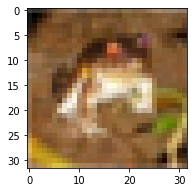

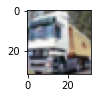

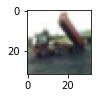

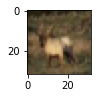

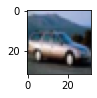

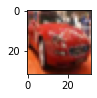

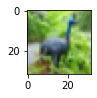

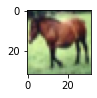

In [ ]:
n=8
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_x[i])
  plt.show()

In [ ]:
#import the required layers and module to create our convolution neural net archietecture

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [ ]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
                 padding = 'same',activation='relu',
                 kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
sgd=SGD(learning_rate=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [ ]:
# Train the model

model.fit(train_X, train_Y,
          validation_data = (test_X,test_Y),
          epochs =10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 289s 173ms/step - loss: 1.9079 - accuracy: 0.3059 - val_loss: 1.3983 - val_accuracy: 0.5000
Epoch 2/10
1563/1563 [==============================] - 249s 159ms/step - loss: 1.4236 - accuracy: 0.4847 - val_loss: 1.2259 - val_accuracy: 0.5646
Epoch 3/10
1563/1563 [==============================] - 249s 159ms/step - loss: 1.2378 - accuracy: 0.5509 - val_loss: 1.1305 - val_accuracy: 0.5979
Epoch 4/10
1563/1563 [==============================] - 242s 155ms/step - loss: 1.0901 - accuracy: 0.6088 - val_loss: 1.0882 - val_accuracy: 0.6197
Epoch 5/10
1563/1563 [==============================] - 241s 154ms/step - loss: 0.9958 - accuracy: 0.6456 - val_loss: 1.0204 - val_accuracy: 0.6408
Epoch 6/10
1563/1563 [==============================] - 236s 151ms/step - loss: 0.9052 - accuracy: 0.6812 - val_loss: 1.0083 - val_accuracy: 0.6508
Epoch 7/10
1563/1563 [==============================] - 238s 152ms/step - loss: 0.8281 - accuracy: 0.7042 - val_

In [ ]:
#calculating the accuracy
_,acc = model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 9s 30ms/step - loss: 0.9289 - accuracy: 0.6844
68.44000220298767


In [ ]:
# save the model
model.save("Model_cifar_10epoch.h5")

In [ ]:
results = {
    0:"aeroplane",
    1:"automobile",
    2:'bird',
    3:'cat',
    4:"deer",
    5:'dog',
    6:"frog",
    7:'horse',
    8:"ship",
    9:'truck'
}

from PIL import Image
import numpy as np
im = Image.open("/content/flight.jfif")


im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

0 aeroplane


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
!apt-get install python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
#Image Classification

import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy


In [ ]:
#load the trained model to classify the images

from keras.models import load_model 
model= load_model("Model_cifar_10epoch.h5")


#dictionary to label all the CIFAR-10 dataset classes.
classes = {
    0:"aeroplane",
    1:"automobile",
    2:'bird',
    3:'cat',
    4:"deer",
    5:'dog',
    6:"frog",
    7:'horse',
    8:"ship",
    9:'truck'}



In [ ]:
top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification CIFAR10')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail((top.winfo_width()/2.25),
                          (top.winfo_height()/2.25))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,
  padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification CIFAR10",pady=20, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()